# Practical 6: MRIO seminal works

**Objectives:**
- Learn how to replicate the methods and results from a few studies. 
- Understand and explain main results from EEIOA studies using MRIO seminal works

In [1]:
# Import modules
import pandas as pd
import numpy as np

## Data pre-processing

### Load data

In [2]:
dir_path = "../data/IOT_2019_pxp/"

The folder has the following structure:  

```
├── impacts  
│   ├── F_Y.txt  
│   ├── F.txt  
│   └── ...
├── satellite  
│   ├── F_Y.txt  
│   ├── F.txt  
│   └── ...
├── A.txt
├── finaldemands.txt  
├── industries.txt  
├── products.txt  
├── unit.txt  
├── x.txt  
├── Y.txt  
└── Z.txt  
```

In [3]:
# Import A, Y, F and F_Y (from impacts)
# ! 'A' is a large datasets, mind load time
A = pd.read_csv(f'{dir_path}A.txt', delimiter="\t", header=[0,1], index_col=[0,1])
Y = pd.read_csv(f'{dir_path}Y.txt', delimiter="\t", header=[0,1], index_col=[0,1])
# ! we use the satellite folder this time because...
F = pd.read_csv(f'{dir_path}satellite/F.txt', delimiter="\t", header=[0,1], index_col=[0])
F_y = pd.read_csv(f'{dir_path}satellite/F_Y.txt', delimiter="\t", header=[0,1], index_col=[0])
F_unit = pd.read_csv(f'{dir_path}satellite/unit.txt', delimiter="\t", header=[0,1], index_col=[0])

### Get labels

In [4]:
# get multiindex
region_and_sector_labels = A.index

# get each level using  'get_level_values()'
region_labels = A.index.get_level_values(level=0).unique()
sector_labels = A.index.get_level_values(level=1).unique()

# visualize
region_labels

Index(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR',
       'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO',
       'SE', 'SI', 'SK', 'GB', 'US', 'JP', 'CN', 'CA', 'KR', 'BR', 'IN', 'MX',
       'RU', 'AU', 'CH', 'TR', 'TW', 'NO', 'ID', 'ZA', 'WA', 'WL', 'WE', 'WF',
       'WM'],
      dtype='object', name='region')

## Input-Output calculations
### Leontief inverse

In [5]:
# Create an identity matrix the same order
Id = np.identity(len(region_and_sector_labels))

# Compute leontief inverse matrix in the Demand-pull model
L_values = np.linalg.inv((Id - A))
L = pd.DataFrame(L_values, index=region_and_sector_labels, columns=region_and_sector_labels)


### Product output X

In [6]:
# Computer using L
X = L @ Y.sum(axis=1)

## Exercise 1
[Hertwich and Peters (2009)](https://doi.org/10.1021/es803496a) developed an analysis of the carbon footprint of multiple countries in 2001. Their results show the carbon footprint of different final demand categories per product.

![global CP2 footprint](../img/global_CO2_footprint.png) 
Figure 1. Global CO2 footprint for different consumption categories and users retrieved from Hertwich and Peters (2009)

In this exercise you will reproduce these results using EXIOBASE and compare any changes between 2001 and 2011

### Environmental intensity

In [7]:
# compute extension intensity
f = F / X.transpose()
f = f.replace([np.inf, -np.inf, np.nan], 0)  # ! don't forget to replace
f.columns = region_and_sector_labels

# Visualise
f

region                                                     AT            \
sector                                             Paddy rice     Wheat   
stressor                                                                  
Taxes less subsidies on products purchased: Total         0.0  0.015956   
Other net taxes on production                             0.0 -0.045710   
Compensation of employees; wages, salaries, & e...        0.0  0.002768   
Compensation of employees; wages, salaries, & e...        0.0  0.037726   
Compensation of employees; wages, salaries, & e...        0.0  0.006072   
...                                                       ...       ...   
Energy Carrier Net TMAR                                   0.0  0.000000   
Energy Carrier Net TOTH                                   0.0  0.000000   
Energy Carrier Net TRAI                                   0.0  0.000000   
Energy Carrier Net TROA                                   0.0  4.207262   
Energy Carrier Net LOSS                                   0.0  0.000000   

region                                                                \
sector                                             Cereal grains nec   
stressor                                                               
Taxes less subsidies on products purchased: Total           0.013130   
Other net taxes on production                              -0.043477   
Compensation of employees; wages, salaries, & e...          0.002423   
Compensation of employees; wages, salaries, & e...          0.033030   
Compensation of employees; wages, salaries, & e...          0.005317   
...                                                              ...   
Energy Carrier Net TMAR                                     0.000000   
Energy Carrier Net TOTH                                     0.000000   
Energy Carrier Net TRAI                                     0.000000   
Energy Carrier Net TROA                                     0.246545   
Energy Carrier Net LOSS                                     0.000000   

region                                                                      \
sector                                             Vegetables, fruit, nuts   
stressor                                                                     
Taxes less subsidies on products purchased: Total                 0.006244   
Other net taxes on production                                    -0.030091   
Compensation of employees; wages, salaries, & e...                0.001997   
Compensation of employees; wages, salaries, & e...                0.027227   
Compensation of employees; wages, salaries, & e...                0.004383   
...                                                                    ...   
Energy Carrier Net TMAR                                           0.000000   
Energy Carrier Net TOTH                                           0.000000   
Energy Carrier Net TRAI                                           0.000000   
Energy Carrier Net TROA                                           0.385840   
Energy Carrier Net LOSS                                           0.000000   

region                                                        \
sector                                             Oil seeds   
stressor                                                       
Taxes less subsidies on products purchased: Total   0.007371   
Other net taxes on production                      -0.045162   
Compensation of employees; wages, salaries, & e...  0.001336   
Compensation of employees; wages, salaries, & e...  0.018216   
Compensation of employees; wages, salaries, & e...  0.002932   
...                                                      ...   
Energy Carrier Net TMAR                             0.000000   
Energy Carrier Net TOTH                             0.000000   
Energy Carrier Net TRAI                             0.000000   
Energy Carrier Net TROA                             0.208691   
Energy Carrier 

### Contribution of Final Demand to the CO2 footprint

From the final demand matrix `Y`, calculate the global final demand of:
- `households` (y_hh)
- `government expenditures` (y_gov)
- `gross capital formation` (y_gfcf)

In [8]:
# select extension indicator
CO2 = 'CO2 - combustion - air'

# select final demand sectors
HH = 'Final consumption expenditure by households' 
GOV = 'Final consumption expenditure by government'	
GFCF = 'Gross fixed capital formation'

f_co2 = f.loc[CO2]
F_co2 = pd.DataFrame(index=region_and_sector_labels)

# compute global final demand and CO2 footprint associated
for sector in [HH, GOV, GFCF]:
    Y_co2_sector = Y.loc[:, pd.IndexSlice[:, sector]].sum(axis=1)  # sum all columns to get global final expenditure
    F_co2_sector = f_co2 @ L @ np.diag(Y_co2_sector)  # ! diagonalise global final expenditure to decompose per products
    F_co2[sector] = F_co2_sector

### Aggregate CO2 footprint per sector

In [9]:
# aggregate results per product category
# ! groupby will reshuffle index order --> use reindex()
df_co2 = F_co2.groupby('sector').sum().reindex(index = sector_labels)
df_co2

,Final consumption expenditure by households,Final consumption expenditure by government,Gross fixed capital formation
sector,,,
Paddy rice,1.163226e+11,2.764598e+09,2.569134e+05
Wheat,8.774667e+10,4.301932e+09,1.542536e+08
Cereal grains nec,4.123314e+10,5.426277e+08,4.826224e+07
"Vegetables, fruit, nuts",1.433983e+11,2.258876e+09,1.671479e+09
Oil seeds,5.563191e+09,2.524394e+08,4.974647e+05
...,...,...,...
Membership organisation services n.e.c. (91),4.020530e+10,6.227451e+09,0.000000e+00
"Recreational, cultural and sporting services (92)",1.454217e+11,4.534025e+10,1.241992e+10
Other services (93),2.196536e+11,1.094400e+09,2.627978e+09


### Cluster relevant sectors

In [10]:

# cluster relevant sectors together
clusters = {
    'agriculture & mining' : sector_labels[0:41],
    'manufacturing': sector_labels[41:149],
    'construction': sector_labels[149:151],
    'service': sector_labels[151:200],
}

Footprint = pd.DataFrame(np.nan, index=clusters.keys(), columns=df_co2.columns)
for cluster, labels in clusters.items():
    Footprint.loc[cluster] = df_co2.loc[labels].sum(axis=0)

<AxesSubplot:title={'center':"'CO2 - combustion - air' per final demand category"}, ylabel='[kg]'>

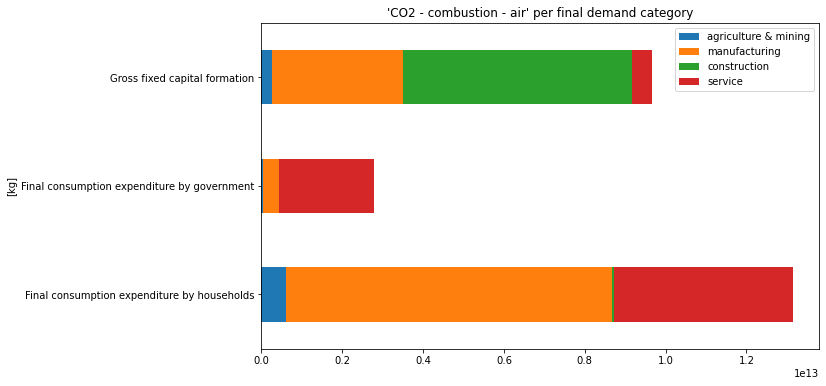

In [11]:
# Plot results
Footprint.T.plot(  # transpose to show per final demand sector
    figsize = (10,6),
    kind = 'barh',
    stacked=True,
    ylabel = F_unit.loc[CO2].values, #
    title = f"'{CO2}' per final demand category",
)

## References
Hertwich, E. G., & Peters, G. P. (2009). Carbon footprint of nations: A global, trade-linked analysis. Environmental Science and Technology, 43(16), 6414–6420. https://doi.org/10.1021/es803496a

Wood, R., Stadler, K., Simas, M., Bulavskaya, T., Giljum, S., Lutter, S., & Tukker, A. (2018). Growth in Environmental Footprints and Environmental Impacts Embodied in Trade: Resource Efficiency Indicators from EXIOBASE3. Journal of Industrial Ecology, 22(3), 553–562. https://doi.org/10.1111/jiec.12735